In [56]:
#import library as require
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [57]:
#import dataset 
df = pd.read_csv('Housing.csv') #import dataset
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [58]:
#encode
df_encoded = pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea','furnishingstatus'], drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [59]:
# split the dataset into features  and targets  
x=df_encoded.drop('price',axis=1)
y=df_encoded['price']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [60]:

X=df_encoded[["area","bedrooms","bathrooms","stories","parking","mainroad_yes","airconditioning_yes","prefarea_yes","furnishingstatus_semi-furnished","furnishingstatus_unfurnished"]]
#df_encoded

In [61]:
#model training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
#compile the model
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [63]:
#predict
y_pred=model.predict(X_test)
y_pred

array([4967880.81167072, 7535367.33618493, 3311527.06220288,
       4806672.20780222, 3561822.27055058, 3703224.33171664,
       5894704.25776466, 6147484.18715093, 2607120.90250412,
       2882163.41454342, 9940042.65744692, 2928641.04362957,
       3304558.2072377 , 3167061.8436664 , 3396944.6287303 ,
       5246029.11632943, 3172472.49014144, 4909110.21495492,
       4064567.59999978, 3773162.63489697, 5863523.81854369,
       5622302.70285204, 2861515.4629062 , 4308948.99447099,
       5095991.72609927, 7498581.96070155, 2729855.11334702,
       4833166.9494098 , 8065614.73962708, 3558737.02470583,
       6454387.00259163, 3421575.19517587, 6690388.64050457,
       4377837.13662519, 3704946.24870155, 6093319.16251678,
       4363741.14244759, 4138491.8869469 , 3366432.69788991,
       4901400.70560423, 4807569.40382851, 3666253.78613414,
       7516525.0679117 , 4184602.01112476, 3949808.89995849,
       4422199.88993438, 6881075.72826141, 4255899.60095038,
       3898075.74628717,

In [64]:
#calculate mean absolute error
mae=mean_absolute_error(y_test,y_pred)
mae

1006660.2348963569

In [65]:
#calculate mean squared error
mse=mean_squared_error(y_test,y_pred)
mse

1857743627508.0828

In [66]:
#caluclate R-squared score
r2=r2_score(y_test,y_pred)
r2

0.6324625958367049

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error (MSE): 1857743627508.08
R-squared (R²) Score: 0.63


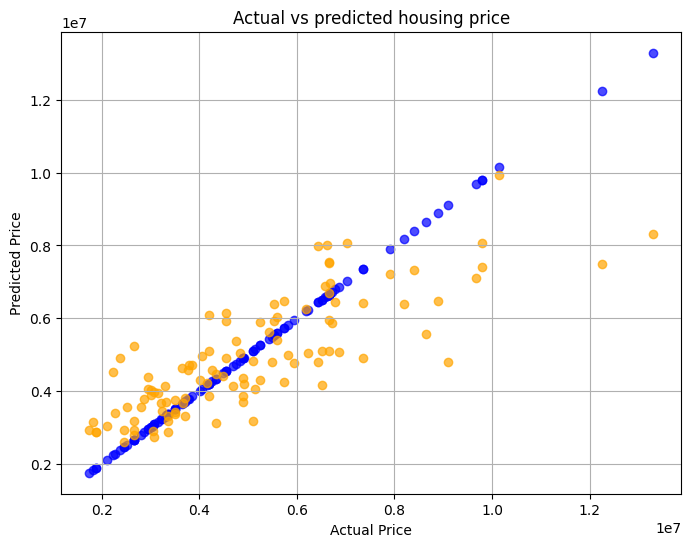

In [68]:
#visualize
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,color="blue",alpha=0.7,label="actual")
plt.scatter(y_test,y_pred,color="orange",alpha=0.7,label="Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted housing price")
plt.grid(True)
plt.show()